In [87]:

import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.1 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.18.1 (need at least 0.11.0)
Mapltolib version:     1.5.3 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


In this problem we will perform a basic exploratory analysis on the NYCFlights13 dataset.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline

In [89]:
flights_df= pd.read_csv('flights.csv')


In [90]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [91]:
flights_df.dest.unique()
flights_df.head(10)


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [92]:
nycflight = pd.DataFrame(flights_df)

##Question 1
Let’s explore flights from NYC to Seattle.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [93]:
# Calculating the number of flights from NYC to SEA in 2013

len(nycflight[(nycflight.dest == 'SEA') & (nycflight.year == 2013)].index)

3923

We can see that there were 3923 flights from NYC airports to Seattle

(b) How many airlines fly from NYC to Seattle?

In [94]:
# Calculating the number of airlines from NYC to SEA 

len(nycflight[nycflight.dest == 'SEA'].groupby(nycflight['carrier']))


5

We can see that there are 5 airlines which fly from NYC to Seattle

(c) How many unique air planes fly from NYC to Seattle?

In [95]:
# Calculating the number of unique airplanes flying from NYC to SEA based on the tailnum

len(nycflight[nycflight.dest == 'SEA'].groupby(nycflight['tailnum']))

935

We can see that there are 935 unique airplans flying from NYC to Seattle

(d) What is the average arrival delay for flights from NC to Seattle?

In [96]:
# Calculating the average arrival delay

f_delay = nycflight[nycflight.dest == 'SEA']
f_delay['arr_delay'].mean()


-1.0990990990990992

We can see that the average arrival delay for flights flying from NYC to SEA is quite less i.e -1.099

(e) What proportion of flights to Seattle come from each NYC airport?

In [97]:
# Calculating the proportion of flights to Seattle from NYC

p_flight = nycflight[nycflight.dest == 'SEA'].groupby(nycflight['origin']).size()
p_flight['tot'] = len(nycflight[nycflight.dest == 'SEA'])
p_flight / p_flight['tot'] * 100



origin
EWR     46.673464
JFK     53.326536
tot    100.000000
dtype: float64

We can see that there are flights to Seattle from 2 out of 3 NYC airports, 46% from EWR and 53% from JFK

## Question 2


(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [98]:
#Approaach 1:

# Creating a data frame grouping by month and day since year is 2013 for all values for departure delay

d_delay = pd.DataFrame(nycflight['dep_delay'].groupby([nycflight['day'],nycflight['month']]).mean())

# Sorting the values in descending order for departure delay
d_delay=d_delay.sort_values(['dep_delay'], ascending = False)

print(d_delay.head(1))

# Creating a data frame grouping by month and day since year is 2013 for all values for arrival delay

a_delay = pd.DataFrame(nycflight['arr_delay'].groupby([nycflight['day'],nycflight['month']]).mean())

# Sorting the values in descending order for arrival delay
a_delay = a_delay.sort_values(['arr_delay'], ascending = False)

print(a_delay.head(1))

#Approach 2:

nycflight['date'] = nycflight['month'].astype(str) + "-" + nycflight['day'].astype(str) + "-" + nycflight['year'].astype(str)
mean_date = pd.DataFrame(nycflight.groupby('date').mean())

#The largest average departure delay

print(max(mean_date['dep_delay']))

#The largest arrival delay
print(max(mean_date['arr_delay']))


           dep_delay
day month           
8   3      83.536921
           arr_delay
day month           
8   3      85.862155
83.5369211514
85.8621553885


We can see that the maximum departure and arrival delays were on the same day i.e 8th March 2013

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [99]:
#Approach 1

#counting the number of flights with departure delay >=0 
delay_w = pd.DataFrame(nycflight[nycflight.dep_delay >= 0].groupby([nycflight['day'],nycflight['month']]).count())
delay_worst = delay_w.sort_values(['dep_delay'], ascending = False)

print("\nThe day with the most number of flights delayed")
print(delay_worst['Unnamed: 0'].head(1))

#Approach 2

# similar to the approach followed in the previous question

d_delay = pd.DataFrame(nycflight['dep_delay'].groupby([nycflight['day'],nycflight['month']]).mean())

d_delay=d_delay.sort_values(['dep_delay'], ascending = False)

print("\nThe day with the highest average of departure delay")

d_delay.head(1)



The day with the most number of flights delayed
day  month
23   12       710
Name: Unnamed: 0, dtype: int64

The day with the highest average of departure delay


,,dep_delay
day,month,
8,3,83.536921


The most number of delayed flights were on 23rd December 2013. Thus the probability of having a flight delayed will be the highest on this day.

The day with the highest average of departure delay is 8th March 2013. Thus the average delay if you are on a flight which is delayed is higher.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

       dep_delay
month           
1      10.036665
2      10.816843
3      13.227076
4      13.938038
5      12.986859
6      20.846332
7      21.727787
8      12.611040
9       6.722476
10      6.243988
11      5.435362
12     16.576688


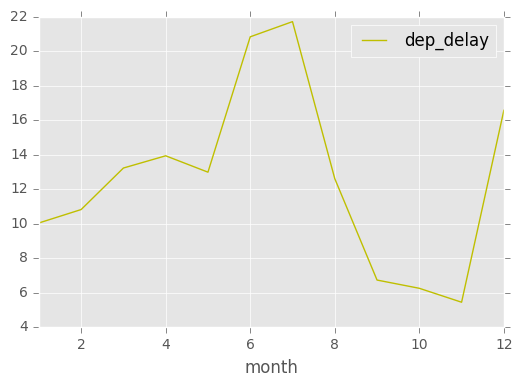

In [100]:
#Approach 1

# Creating a data frame grouping by month for all values for departure delay

d_delay = pd.DataFrame(nycflight['dep_delay'].groupby(nycflight['month']).mean())
print(d_delay)

#Approach 2

#Plotting the departure delays based on months

df2=pd.DataFrame(nycflight.groupby('month')['dep_delay'].mean())
df2.plot(color='y')

We can see that the departure delays are lowest for the months of sep - nov which is primarily the autumn quarter and the delays shoot up in december. This can be attributed to the holiday season and the large number of people that travel. There is a siginificant rise in the delays in the winter and spring quarter as well. The delays during summer i.e June and July are the highest. Thus we can see some trend in the departure delays of flights.

(d) On average, how do departure delays vary over the course of a day?

       dep_delay
hour            
0.0   128.642452
1.0   207.049327
2.0   239.921875
3.0   304.727273
4.0    -5.554098
5.0    -4.355644
6.0    -1.520552
7.0     0.223289
8.0     1.091432
9.0     4.268295
10.0    5.548644
11.0    5.652309
12.0    7.601892
13.0    9.380639
14.0    8.090381
15.0   10.682049
16.0   13.621150
17.0   16.756593
18.0   18.664671
19.0   21.497342
20.0   28.266213
21.0   42.064964
22.0   68.190042
23.0   96.946865
24.0   64.862069


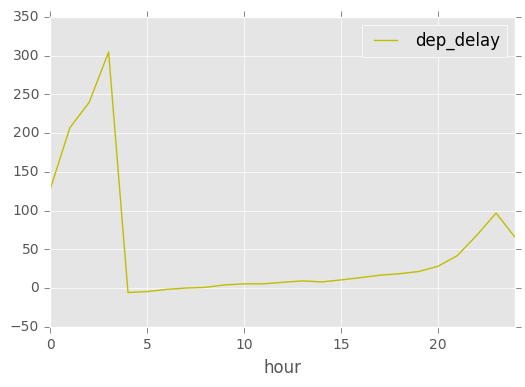

In [101]:
#Approach 1

d_delay = pd.DataFrame(nycflight['dep_delay'].groupby(nycflight['hour']).mean())
print(d_delay)

#Approach 2

df2=pd.DataFrame(nycflight.groupby('hour')['dep_delay'].mean())
df2.plot(color='y')

We can see that the departure delays are significantly low during the day and shoot up gradually.The delays are hghest between 12 AM to 3 AM in the night. Thus the probability of flights being delayed during this time frame is the highest.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [102]:
#Calculating the speed
d_delay = pd.DataFrame(nycflight, columns=['tailnum','carrier'])
d_delay['speed'] = nycflight['distance'] / nycflight['air_time']

# Sorting the values in descending order for speed
d_delay=d_delay.sort_values(['speed'], ascending = False)

print(d_delay.head(1))

       tailnum carrier      speed
216447  N666DN      DL  11.723077


Thus we can see that the highest speed is for the flight N666DN with the carrier DL i.e 11.72. Thus this flight flew the fastest.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [103]:
#Grouping by carrier, flight and dest

d_delay = pd.DataFrame(nycflight['dest'].groupby([nycflight['carrier'],nycflight['flight'],nycflight['dest']]).size().rename('count'))
# Sorting the values in descending order for speed
d_delay=d_delay.sort_values(['count'], ascending = False)

#Number of flights flying everyday
print(len(d_delay[d_delay['count'] == 365]))

print(d_delay[d_delay['count'] == 365])


18
                     count
carrier flight dest       
AA      1611   MIA     365
B6      703    SJU     365
AA      1357   SJU     365
VX      413    LAX     365
B6      219    CLT     365
UA      15     HNL     365
B6      359    BUR     365
        371    FLL     365
        431    SRQ     365
AA      181    LAX     365
DL      2159   MCO     365
AA      119    LAX     365
VX      407    LAX     365
EV      5712   IAD     365
VX      251    LAS     365
AA      59     SFO     365
B6      1783   MCO     365
DL      2391   TPA     365


We can see that there are 18 flights which fly to different destinations such as LAX, SJU, IAD etc everyday

## Question 5
Research question

The research question is:

1. On an average how many flights depart from each of the aiports at NY and is there any association with the number of flights departing from the airport and the delays associated with each aiport, carriers and flight duration? Can we predict the delay of flights based on such factors?

I believe this question is interesting given this data set because if an aiport is always busy and that is the direct cause of delays in flight departures and arrivals, then this correlation can be use to even out the number of flights among the 3 airports to avoid delays and can be of great help to passengers on tight schedules as they can avoid such airports.

The steps to conduct this analysis will be:
a. Check for the number of flights departing from each airport
b. Check for the arrival delays associated with each airport
c. Check for the departure delays associated with each airport
d. Check for delays associated with airtime and carriers

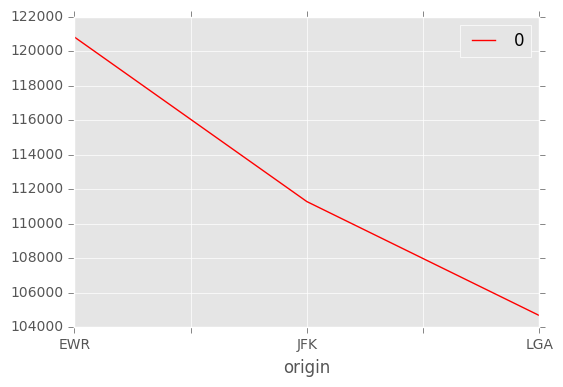

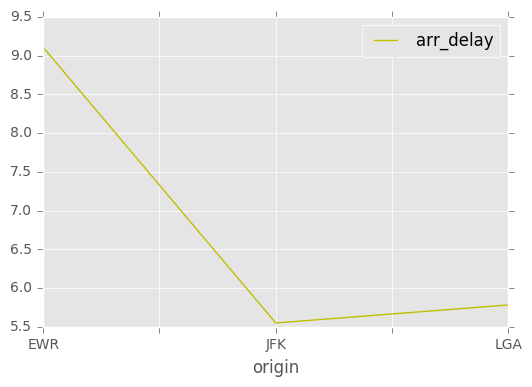

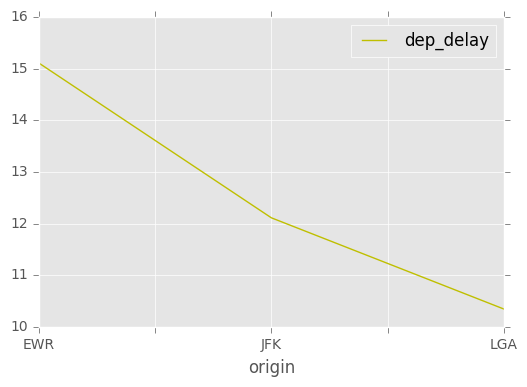

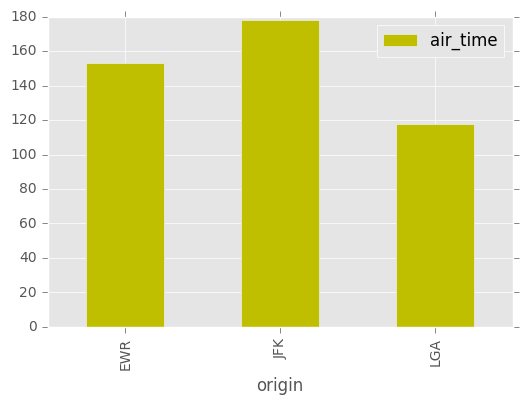

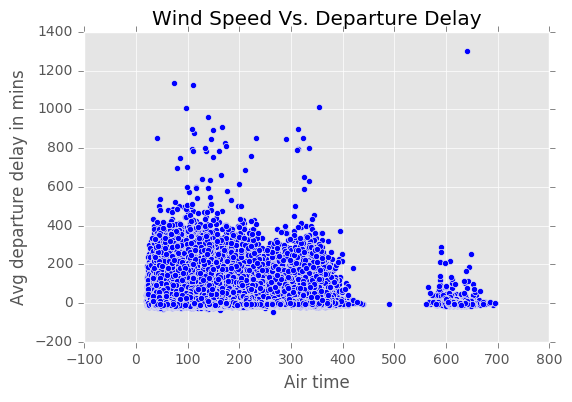

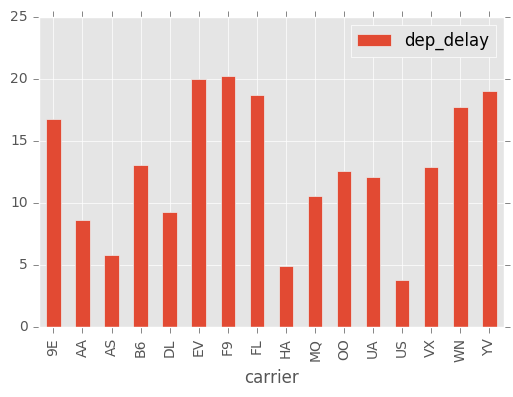

In [118]:
from pandas import DataFrame, read_csv 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 

df= DataFrame(nycflight) 

#Calculate the number of flights from each airport
df1=pd.DataFrame(df.groupby('origin').size())
df1.plot(color='r')

#Calculate the average arrival delay from each airport 
df2=pd.DataFrame(df.groupby('origin')['arr_delay'].mean())
df2.plot(color='y')


#Calculate the average departure delay from each airport 
df3=pd.DataFrame(df.groupby('origin')['dep_delay'].mean())
df3.plot(color='y')

#Calculate the average airtime for each airport
df3=pd.DataFrame(df.groupby('origin')['air_time'].mean())
df3.plot(kind = "bar", color='y')

#Plot the relation between air time and departure delay
fig = plt.figure()
plt.scatter(df['air_time'],df['dep_delay'])
xlabel('Air time')
ylabel('Avg departure delay in mins')
title('Air time Vs. Departure Delay')


#Plot the relation between carriers and average departure delay
df2=pd.DataFrame(df.groupby('carrier')['dep_delay'].mean())
df2.plot(kind = "bar")


We can now see that the arrival and departure delays are pretty consistent with each other, and also the values obtained in the above analysis of the busiest airport. Thus it might be a possibility that EWR experiences maximum delays because it has the most number of departing flights. Thus to answer the question, there might be an association between the two.
Additionally we can see that as the air time increases, the departure delays shift a little to the lower side. Thus there might be some association between air time and delays. We can see that since JFK has the highest average air time, the delays are comparitively lesser than EWR.
The delays in departure also vary vastly for different carriers. There are carriers such as EV and F9 which have the highest delays in departure and others such as AS and US which have very low delays in departure.

Thus to conclude there are different factors like these which can be assessed to conclude the delays in specific flights from specific airports.



# Question 6

What weather conditions are associated with flight delays leaving NYC? 

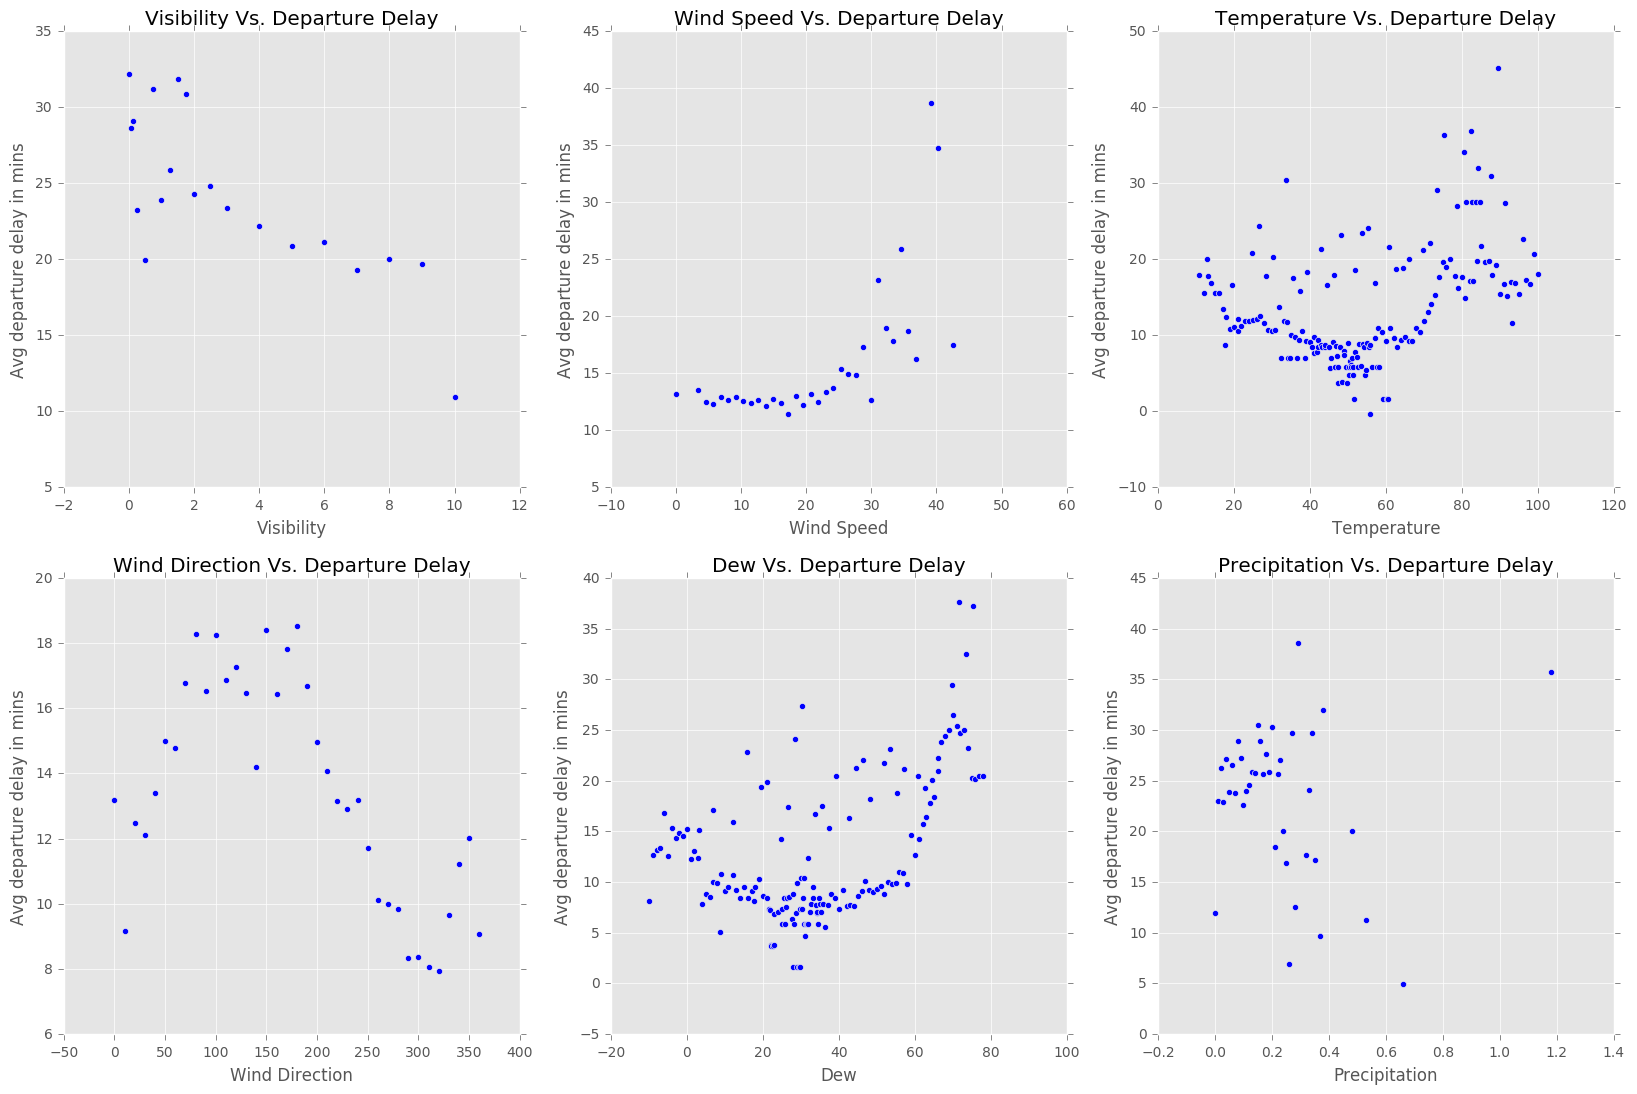

In [105]:
#Reading weather.csv data
weather_df= pd.read_csv('weather.csv')
nycweather = pd.DataFrame(weather_df)
nycweather.head(10)

#Joining it with flights dataset
s1 = pd.merge(nycweather, nycflight, how='inner', on=['year', 'month', 'day', 'origin'])

#As visibility index increases, the departure delay decreases.
df2=pd.DataFrame(s1.groupby('visib')['dep_delay'].mean())
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 20, 20
fig = plt.figure()
ax1 = fig.add_subplot(331)
df2['visib'] = df2.index
ax1.scatter(df2['visib'],df2['dep_delay'])
xlabel('Visibility')
ylabel('Avg departure delay in mins')
title('Visibility Vs. Departure Delay')

#Plot between wind speed and departure delay
ax2 = fig.add_subplot(332)
df2=pd.DataFrame(s1.groupby('wind_speed')['dep_delay'].mean())
df2['wind_speed'] = df2.index
ax2.scatter(df2['wind_speed'],df2['dep_delay'])
axis([-10,60,5,45])
xlabel('Wind Speed')
ylabel('Avg departure delay in mins')
title('Wind Speed Vs. Departure Delay')

#Plot between Temperature and departure delay
ax3 = fig.add_subplot(333)
df2=pd.DataFrame(s1.groupby('temp')['dep_delay'].mean())
df2['temp'] = df2.index
ax3.scatter(df2['temp'],df2['dep_delay'])
xlabel('Temperature')
ylabel('Avg departure delay in mins')
title('Temperature Vs. Departure Delay')

#Plot between wind direction and departure delay
ax4 = fig.add_subplot(334)
df2=pd.DataFrame(s1.groupby('wind_dir')['dep_delay'].mean())
df2['wind_dir'] = df2.index
ax4.scatter(df2['wind_dir'],df2['dep_delay'])
xlabel('Wind Direction')
ylabel('Avg departure delay in mins')
title('Wind Direction Vs. Departure Delay')

#Plot between dewp and departure delay
ax5 = fig.add_subplot(335)
df2=pd.DataFrame(s1.groupby('dewp')['dep_delay'].mean())
df2['dewp'] = df2.index
ax5.scatter(df2['dewp'],df2['dep_delay'])
xlabel('Dew')
ylabel('Avg departure delay in mins')
title('Dew Vs. Departure Delay')


In this question we try to study departure delays. We can see that a variety of weather conditions have an effect on the flights' departure delay.
1. The first plot shows that as visibility increases, the departure delay in turn decreases. Thus by analyzing such parameters, we can predict if a flight will be delayed or not.
2. The second plot shows the relation between wind speed and departure delay. We see that as the wind speed increases, the departure delays increase proportionately.
3. The third plot shows the correlation between temperature and departure delay, We can see that as the temperature increases, the departure delay decreases but then increase again as temperatures get really high. Thus in lower and extremely high temperatures, the chances of flights being delayed are higher.
4. The fourth plot shows the relationship between wind direction and departure delay. We can see a sinosoidal pattern in the graph where the delays increase as the wind direction increases slightly and then decrease again.
5. The fifth plot represents the correlation betweeb dew and departure delays. We can see that there is not a very strong correlation between the 2, but as dew increases there is a slight increase in the departure delay.